### Практическая работа №1

<h6>Задание:</h6>

На любом языке программирования реализовать преобразование простого алгебраического выражения в обратную польскую запись.

<h6>Решение:</h6>

In [ ]:
def precedence(operator):
    if operator == '+' or operator == '-':
        return 1
    elif operator == '*' or operator == '/':
        return 2
    return 0
def infix_to_postfix(expression):
    output = []
    stack = []
    for token in expression.split():
        if token.isnumeric():
            output.append(token)
        elif token == '(':
            stack.append(token)
        elif token == ')':
            while stack and stack[-1] != '(':
                output.append(stack.pop())
            stack.pop()
        else:
            while stack and precedence(stack[-1]) >= precedence(token):
                output.append(stack.pop())
            stack.append(token)
    while stack:
        output.append(stack.pop())
    return ' '.join(output)

input_expression = input("Введите алгебраическое выражение: ")
output_expression = infix_to_postfix(input_expression)
print(f"Обратная польская запись: {output_expression}")

### Практическая работа №2

<h6>Задание:</h6>

На любом языке программирования реализовать простой калькулятор алгебраических выражений в обратной польской записи с целыми числами. Поддерживаемые операции: сложение, вычитание, умножение, деление.

<h6>Решение:</h6>

In [ ]:
def calculate(expression):
    stack = []
    for token in expression:
        if token.isdigit() or (token[0] == '-' and token[1:].isdigit()):
            stack.append(int(token))
        else:
            operand2 = stack.pop()
            operand1 = stack.pop()
            if token == '+':
                stack.append(operand1 + operand2)
            elif token == '-':
                stack.append(operand1 - operand2)
            elif token == '*':
                stack.append(operand1 * operand2)
            elif token == '/':
                stack.append(operand1 / operand2)
    return stack[0]

input_expression = input("Введите выражение в обратной польской записи: ")
tokens = input_expression.split()
result = calculate(tokens)
print("Результат выражения:", result)

### Практическая работа №3

<h6>Задание:</h6>

Написать на любом языке программирования лексический анализатор на базе конечного автомата входного языка, описанного диаграммой состояний.

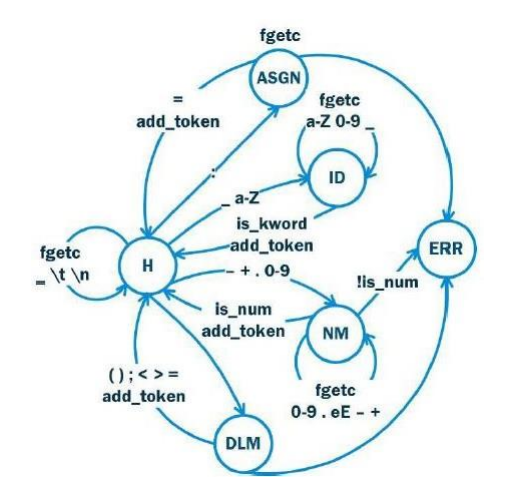

<h6>Решение:</h6>

In [ ]:
import re

# Ключевые слова
keywords = ["for", "do"]

# Класс представляющий токен
class Token:
    def __init__(self, token_name, token_value):
        self.token_name = token_name
        self.token_value = token_value

# Класс представляющий таблицу лексем
class LexemeTable:
    def __init__(self, tok, next=None):
        self.tok = tok
        self.next = next

# Инициализация переменных для таблицы лексем
lt = None
lt_head = None

# Лексический анализатор
def lexer(filename):
    try:
        with open(filename, 'r') as fd:
            CS = 'H'
            c = fd.read(1)

            while c:
                if CS == 'H':
                    while c.isspace():
                        c = fd.read(1)
                    if re.match(r'[A-Za-z_]', c):
                        CS = 'ID'
                    elif re.match(r'[0-9.]|[+-]', c):
                        CS = 'NM'
                    elif c == ':':
                        CS = 'ASGN'
                    else:
                        CS = 'DLM'

                if CS == 'ASGN':
                    colon = c
                    c = fd.read(1)
                    if c == '=':
                        tok = Token('ASGN', ':=')
                        add_token(tok)
                        c = fd.read(1)
                        CS = 'H'
                    else:
                        err_symbol = colon
                        CS = 'ERR'

                if CS == 'DLM':
                    if c in '();':
                        tok = Token('DELIM', c)
                        add_token(tok)
                        c = fd.read(1)
                        CS = 'H'
                    elif c in '<>=':
                        tok = Token('OPER', c)
                        add_token(tok)
                        c = fd.read(1)
                        CS = 'H'
                    else:
                        err_symbol = c
                        c = fd.read(1)
                        CS = 'ERR'

                if CS == 'ERR':
                    print(f"Unknown character: {err_symbol}")
                    CS = 'H'

                if CS == 'ID':
                    buf = c
                    c = fd.read(1)
                    while re.match(r'[A-Za-z0-9_]', c):
                        buf += c
                        c = fd.read(1)
                    if is_kword(buf):
                        tok = Token('KWORD', buf)
                    else:
                        tok = Token('IDENT', buf)
                    add_token(tok)
                    CS = 'H'

                if CS == 'NM':
                    buf = c
                    c = fd.read(1)
                    while re.match(r'[0-9eE.+-lLfF]', c):
                        buf += c
                        c = fd.read(1)
                    if is_num(buf):
                        tok = Token('NUM', buf)
                    else:
                        tok = Token('ERR', buf)
                    add_token(tok)
                    CS = 'H'

    except IOError:
        print(f"Cannot open file {filename}")

# Проверка, является ли идентификатор ключевым словом
def is_kword(id):
    return id in keywords

# Проверка, является ли строка числом
def is_num(num):
    if re.match(r'^[+-]?\d+$', num):
        return True
    if re.match(r'^[+-]?\d+\.\d*$', num) or re.match(r'^[+-]?\d*\.\d+$', num):
        return True
    if re.match(r'^[+-]?\d+(\.\d*)?[eE][+-]?\d+$', num):
        return True
    if num == '+' or num == '-' or num.lower() == 'e' or num.lower() == 'f' or num.lower() == 'l':
        return True
    return False

# Добавление токена в таблицу лексем
def add_token(tok):
    global lt, lt_head
    new_lexeme = LexemeTable(tok)
    if lt is None:
        lt = new_lexeme
        lt_head = new_lexeme
    else:
        lt.next = new_lexeme
        lt = new_lexeme

# Запуск лексического анализатора
lexer("code.txt")

# Вывод результатов
current = lt_head
while current:
    token_name = ""
    if current.tok.token_name == 'KWORD':
        token_name = "Keyword"
    elif current.tok.token_name == 'IDENT':
        token_name = "Identifier"
    elif current.tok.token_name == 'NUM':
        token_name = "Number"
    elif current.tok.token_name == 'OPER':
        token_name = "Operator"
    elif current.tok.token_name == 'DELIM':
        token_name = "Delimiter"
    elif current.tok.token_name == 'ASGN':
        token_name = "Assignment"
    else:
        token_name = "Unknown"
    print(f"{token_name}: {current.tok.token_value}")
    current = current.next

# Очистка памяти от таблицы лексем
current = lt_head
while current:
    temp = current
    current = current.next
    del temp

### Практическая работа №4

<h6>Задание:</h6>

Задание: на любом языке программирования написать программу преобразования недетерминированного конечного автомата (НКА) в детерминированный (ДКА).

<h6>Решение:</h6>

In [3]:
def epsilon_closure(states, transitions, epsilon='eps'):
    closure = set(states)  # Начальное состояние замыкания содержит переданные состояния
    stack = list(states)  # Используем стек для отслеживания состояний, которые нужно обработать
    while stack:
        state = stack.pop()
        for transition in transitions:
            if transition[0] == state and transition[1] == epsilon:
                if transition[2] not in closure:
                    closure.add(transition[2])
                    stack.append(transition[2])
    return closure


def move(states, transitions, symbol):
    result = set()
    for state in states:
        for transition in transitions:
            if transition[0] == state and transition[1] == symbol:
                result.add(transition[2])
    return result


def nfa_to_dfa(states, alphabet, transitions, initial_states, final_states):
    dfa_states = []
    dfa_transitions = []
    dfa_initial_state = frozenset(epsilon_closure(initial_states, transitions))
    dfa_states.append(dfa_initial_state)
    stack = [dfa_initial_state]

    while stack:
        current_dfa_state = stack.pop()
        for symbol in alphabet:
            next_nfa_state = epsilon_closure(move(current_dfa_state, transitions, symbol), transitions)
            if next_nfa_state not in dfa_states:
                dfa_states.append(next_nfa_state)
                stack.append(next_nfa_state)
            dfa_transitions.append((current_dfa_state, symbol, next_nfa_state))

    dfa_final_states = [state for state in dfa_states if any(s in state for s in final_states)]

    return dfa_states, alphabet, dfa_transitions, dfa_initial_state, dfa_final_states


def main():
    states = input("Введите множество состояний: ").split()
    alphabet = input("Введите входной алфавит: ").split()
    transitions_input = input("Введите функцию переходов (текущее состояние, входной символ, следующее состояние): ").split()
    transitions = [tuple(t.strip()[1:-1].split(',')) for t in transitions_input]
    initial_states = input("Введите множество начальных состояний: ").split()
    final_states = input("Введите множество конечных состояний: ").split()

    dfa_states, dfa_alphabet, dfa_transitions, dfa_initial_state, dfa_final_states = nfa_to_dfa(
        states, alphabet, transitions, initial_states, final_states)

    # Преобразование наборов состояний в ожидаемый формат
    dfa_states_str = [''.join(sorted(state)) for state in dfa_states]
    dfa_final_states_str = [''.join(sorted(state)) for state in dfa_final_states]

    print("DFA:")
    print("Множество состояний: " + ', '.join(dfa_states_str))
    print("Входной алфавит: " + ', '.join(dfa_alphabet))
    print("Функция переходов:")
    for transition in dfa_transitions:
        current_state = ''.join(sorted(transition[0]))
        next_state = ''.join(sorted(transition[2]))
        print(f'D({current_state}, {transition[1]}) = {next_state}')
    initial_state_str = ''.join(sorted(dfa_initial_state))
    print("Начальные состояния: " + initial_state_str)
    print("Конечные состояния: " + ', '.join(dfa_final_states_str))


if __name__ == "__main__":
    main()


'''
1 2 3
a b
(1,a,1) (1,a,2) (1,b,3) (2,a,2) (2,b,1) (2,b,3) (3,a,3) (3,b,3)
1
3
'''


Введите множество состояний: 1 2 3
Введите входной алфавит: a b
Введите функцию переходов (текущее состояние, входной символ, следующее состояние): (1,a,1) (1,a,2) (1,b,3) (2,a,2) (2,b,1) (2,b,3) (3,a,3) (3,b,3)
Введите множество начальных состояний: 1
Введите множество конечных состояний: 3
DFA:
Множество состояний: 1, 12, 3, 13, 123
Входной алфавит: a, b
Функция переходов:
D(1, a) = 12
D(1, b) = 3
D(3, a) = 3
D(3, b) = 3
D(12, a) = 12
D(12, b) = 13
D(13, a) = 123
D(13, b) = 3
D(123, a) = 123
D(123, b) = 13
Начальные состояния: 1
Конечные состояния: 3, 13, 123


'\n1 2 3\na b\n(1,a,1) (1,a,2) (1,b,3) (2,a,2) (2,b,1) (2,b,3) (3,a,3) (3,b,3)\n1\n3\n'